In [142]:
# Manipulation et Analyse de Données
import pandas as pd  # Pandas : Bibliothèque pour la manipulation et l'analyse de données
import category_encoders as ce  # Category Encoders : Bibliothèque pour l'encodage des caractéristiques catégorielles
import numpy as np  # Numpy : Bibliothèque pour les opérations numériques

# Visualisation de Données
import seaborn as sns  # Seaborn : Bibliothèque pour la visualisation statistique des données
import matplotlib.pyplot as plt  # Matplotlib : Bibliothèque de traçage et de visualisation

# Apprentissage Automatique - Prétraitement
from sklearn.pipeline import Pipeline  # Scikit-learn : Outil de création de pipelines pour le prétraitement des données
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder  # Scikit-learn : Outils de prétraitement des données
from sklearn.compose import ColumnTransformer  # Scikit-learn : Outil pour les transformations par colonne

# Apprentissage Automatique - Sélection de Modèle et Évaluation
from sklearn.model_selection import train_test_split, GridSearchCV  # Scikit-learn : Outils de sélection de modèle et de division du jeu de données
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # Scikit-learn : Métriques d'évaluation des modèles
from sklearn.metrics import silhouette_score, davies_bouldin_score, classification_report  # Scikit-learn : Métriques de performance de regroupement
from imblearn.over_sampling import SMOTE  # Imbalanced-learn : Suréchantillonnage des données déséquilibrées
from imblearn.under_sampling import RandomUnderSampler  # Imbalanced-learn : Sous-échantillonnage des données déséquilibrées

# Apprentissage Automatique - Algorithmes de Classification
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression  # Scikit-learn : Modèles linéaires pour la classification
from sklearn.svm import LinearSVC  # Scikit-learn : Machines à vecteurs de support pour la classification
from xgboost import XGBClassifier  # XGBoost : Cadre de renforcement par gradient pour la classification
from lightgbm import LGBMClassifier  # LightGBM : Machine de renforcement légère
from lazypredict.Supervised import LazyClassifier, LazyRegressor  # LazyPredict : Sélection et comparaison automatiques de modèles
from sklearn.tree import DecisionTreeClassifier  # Scikit-learn : Arbre de décision pour la classification

# Apprentissage Automatique - Regroupement et Réduction de Dimensionnalité
from sklearn.cluster import KMeans  # Scikit-learn : Algorithme de regroupement K-Means
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Scikit-learn : Analyse discriminante linéaire

# Utilitaires
from collections import Counter  # Collections : Types de conteneurs, ici pour compter des objets
import warnings  # Warnings : Gestion des avertissements dans le code Python
import inspect  # Inspection du contenu du code
from io import StringIO
from typing import Callable

import statsmodels.api as sm  # Statsmodels : Bibliothèque pour les modèles statistiques
from scipy import stats  # Scipy : Bibliothèque pour les outils scientifiques


In [143]:
# Paramétrage du style esthétique des graphiques
sns.set(style="whitegrid")  # Seaborn : Configuration du style esthétique des graphiques avec un fond blanc et une grille


In [144]:
# Chargement du jeu de données depuis un fichier CSV
file_path = 'data_v1.0 (3).csv'  # Chemin vers le fichier CSV contenant les données
df = pd.read_csv(file_path)  # Utilisation de Pandas pour lire le fichier CSV et stocker les données dans un DataFrame


In [145]:
df.head()

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.00,9.00,26803.00,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.00,13.00,38166.00,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.00,13.00,35207.00,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.00,32442.00,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.00,6.00,28533.00,F,licence,detective,81.91,non,0


    Unnamed: 0 et index: Ces colonnes semblent être des indices, probablement redondants.
    date: La date de l'événement ou de l'enregistrement.
    cheveux: La couleur des cheveux.
    age: L'âge de la personne.
    exp: L'expérience (probablement en années).
    salaire: Le salaire.
    sexe: Le sexe de la personne.
    diplome: Le niveau de diplôme.
    specialite: La spécialité ou le domaine d'études/expertise.
    note: Une note ou évaluation.
    dispo: Disponibilité (oui/non).
    embauche: Indique si la personne a été embauchée (0/1).

# First the general point of view 

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20000 non-null  int64  
 1   index       20000 non-null  int64  
 2   date        19909 non-null  object 
 3   cheveux     19897 non-null  object 
 4   age         19909 non-null  float64
 5   exp         19904 non-null  float64
 6   salaire     19905 non-null  float64
 7   sexe        19900 non-null  object 
 8   diplome     19890 non-null  object 
 9   specialite  19907 non-null  object 
 10  note        19886 non-null  float64
 11  dispo       19894 non-null  object 
 12  embauche    20000 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 2.0+ MB


In [147]:
# Stats résumant le dataset
df.describe(include='all')


,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
count,20000.00,20000.00,19909,19897,19909.00,19904.00,19905.00,19900,19890,19907,19886.00,19894,20000.00
unique,NaN,NaN,1826,4,NaN,NaN,NaN,2,4,4,NaN,2,NaN
top,NaN,NaN,2012-02-03,chatain,NaN,NaN,NaN,M,master,geologie,NaN,non,NaN
freq,NaN,NaN,24,6022,NaN,NaN,NaN,11889,7513,10028,NaN,11848,NaN
mean,9999.50,9999.50,NaN,NaN,35.00,9.50,34974.34,NaN,NaN,NaN,75.17,NaN,0.11
std,5773.65,5773.65,NaN,NaN,9.61,3.01,5003.10,NaN,NaN,NaN,17.10,NaN,0.32
min,0.00,0.00,NaN,NaN,-3.00,-2.00,14128.00,NaN,NaN,NaN,8.68,NaN,0.00
25%,4999.75,4999.75,NaN,NaN,29.00,7.00,31596.00,NaN,NaN,NaN,63.72,NaN,0.00
50%,9999.50,9999.50,NaN,NaN,35.00,9.00,34979.00,NaN,NaN,NaN,75.08,NaN,0.00
75%,14999.25,14999.25,NaN,NaN,41.00,12.00,38358.00,NaN,NaN,NaN,86.62,NaN,0.00


In [148]:
# Count of missing values in each column
df.isnull().sum()

Unnamed: 0      0
index           0
date           91
cheveux       103
age            91
exp            96
salaire        95
sexe          100
diplome       110
specialite     93
note          114
dispo         106
embauche        0
dtype: int64

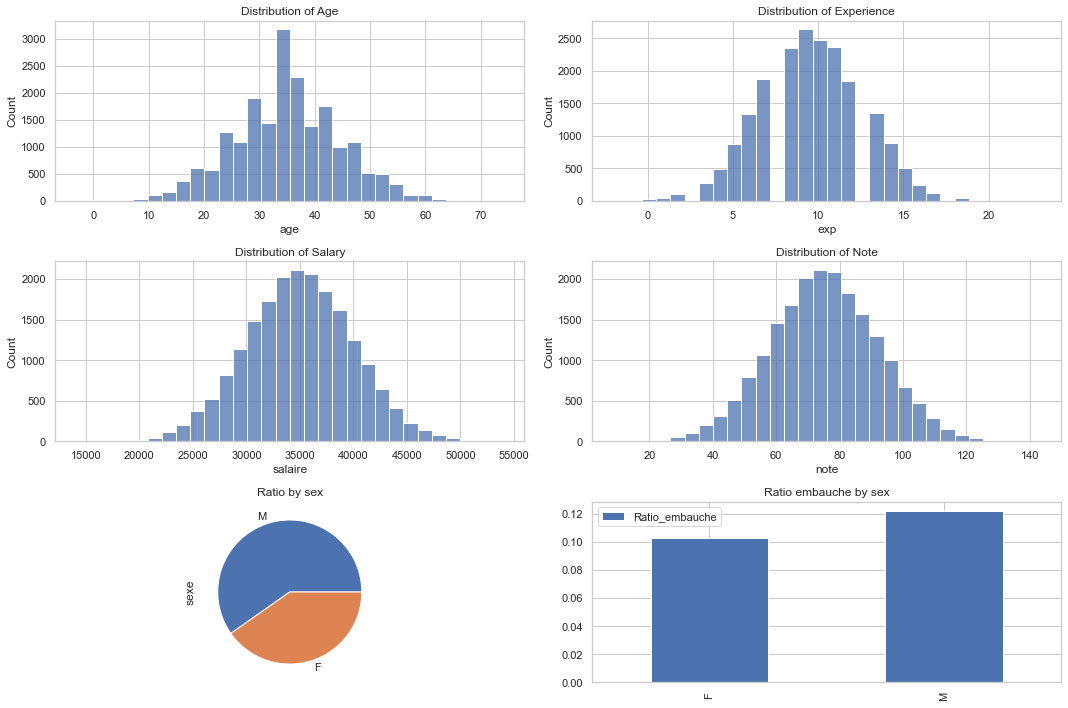

In [149]:

# Plotting distributions of numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Distribution of 'age'
sns.histplot(df['age'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

# Distribution of 'exp'
sns.histplot(df['exp'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Experience')

# Distribution of 'salaire'
sns.histplot(df['salaire'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Salary')

# Distribution of 'note'
sns.histplot(df['note'], bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Note')

# Ratio by sex
df["sexe"].value_counts(normalize=True).plot.pie(ax=axes[2, 0])
axes[2, 0].set_title('Ratio by sex')

# First stats about job inegality
(df.groupby("embauche")["sexe"].value_counts(normalize=False).unstack().T[1]/df["sexe"].value_counts()).to_frame(name='Ratio_embauche').plot.bar(ax=axes[2, 1])
axes[2, 1].set_title('Ratio embauche by sex')
plt.tight_layout()
plt.show()


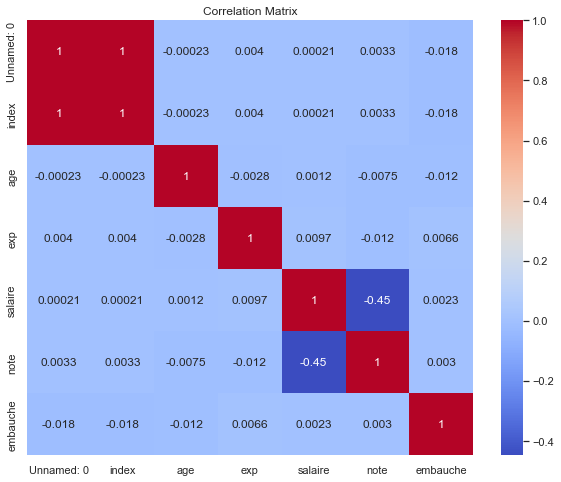

In [150]:
# Correlation analysis
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Now let's deal with the missing values 

In [151]:
# Étape 1 : Gestion des valeurs manquantes

# Remplacement des valeurs manquantes dans les colonnes numériques par la médiane
for column in ['age', 'exp', 'salaire', 'note']:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# Remplacement des valeurs manquantes dans les colonnes catégorielles par le mode (valeur la plus fréquente)
for column in ['cheveux', 'diplome', 'specialite', 'dispo']:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

# Étape 2 : Gestion des valeurs aberrantes (outliers)

# Identification et suppression des valeurs aberrantes pour 'age' (par exemple, les âges négatifs)
df = df[df['age'] > 0]


In [152]:
# Étape 3 : Suppression des colonnes inutiles

# Suppression des colonnes 'Unnamed: 0' et 'index' car elles sont redondantes
df.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)



    Les valeurs manquantes dans les colonnes numériques (age, exp, salaire, note) ont été remplacées par la médiane de chaque colonne.
    Les valeurs manquantes dans les colonnes catégorielles (cheveux, sexe, diplome, specialite, dispo) ont été remplacées par la valeur la plus fréquente (mode) de chaque colonne.
    
    Les valeurs aberrantes dans la colonne age (valeurs négatives) ont été supprimées. La plage d'âge maintenant va de 1 à 74 ans.

In [153]:
# Étape 4 : Conversion des types de données

# Conversion des colonnes temporelles en type datetime
df['date'] = pd.to_datetime(df['date'])

# Conversion des colonnes catégorielles avec des valeurs de type booléen en 0 et 1 réels
df['dispo'] = df['dispo'].map({'non': 0, 'oui': 1})

# Vérification des types de données de chaque colonne et des premières lignes du DataFrame mis à jour
data_types = df.dtypes  # Obtention des types de données de chaque colonne
updated_df_head = df.head()  # Affichage des premières lignes du DataFrame mis à jour

data_types, updated_df_head


(date          datetime64[ns]
 cheveux               object
 age                  float64
 exp                  float64
 salaire              float64
 sexe                  object
 diplome               object
 specialite            object
 note                 float64
 dispo                  int64
 embauche               int64
 dtype: object,
         date cheveux   age   exp  salaire sexe  diplome specialite  note  \
 0 2012-06-02    roux 25.00  9.00 26803.00    F  licence   geologie 97.08   
 1 2011-04-21   blond 35.00 13.00 38166.00    M  licence     forage 63.86   
 2 2012-09-07   blond 29.00 13.00 35207.00    M  licence   geologie 78.50   
 3 2011-07-01    brun 35.00 12.00 32442.00    M  licence   geologie 45.09   
 4 2012-08-07    roux 35.00  6.00 28533.00    F  licence  detective 81.91   
 
    dispo  embauche  
 0      0         0  
 1      0         0  
 2      0         0  
 3      0         0  
 4      0         0  )

In [154]:
df.head()

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,2012-06-02,roux,25.00,9.00,26803.00,F,licence,geologie,97.08,0,0
1,2011-04-21,blond,35.00,13.00,38166.00,M,licence,forage,63.86,0,0
2,2012-09-07,blond,29.00,13.00,35207.00,M,licence,geologie,78.50,0,0
3,2011-07-01,brun,35.00,12.00,32442.00,M,licence,geologie,45.09,0,0
4,2012-08-07,roux,35.00,6.00,28533.00,F,licence,detective,81.91,0,0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19995 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        19904 non-null  datetime64[ns]
 1   cheveux     19995 non-null  object        
 2   age         19995 non-null  float64       
 3   exp         19995 non-null  float64       
 4   salaire     19995 non-null  float64       
 5   sexe        19895 non-null  object        
 6   diplome     19995 non-null  object        
 7   specialite  19995 non-null  object        
 8   note        19995 non-null  float64       
 9   dispo       19995 non-null  int64         
 10  embauche    19995 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 1.8+ MB


In [156]:
#On enlève les valeurs manquante
df=df.dropna()

# Récupérez les colonnes de type 'object'
colonnes_object = df.select_dtypes(include=['object']).columns

# Utilisez pd.get_dummies pour encoder automatiquement les colonnes catégorielles
df_encoded = pd.get_dummies(df, columns=colonnes_object)

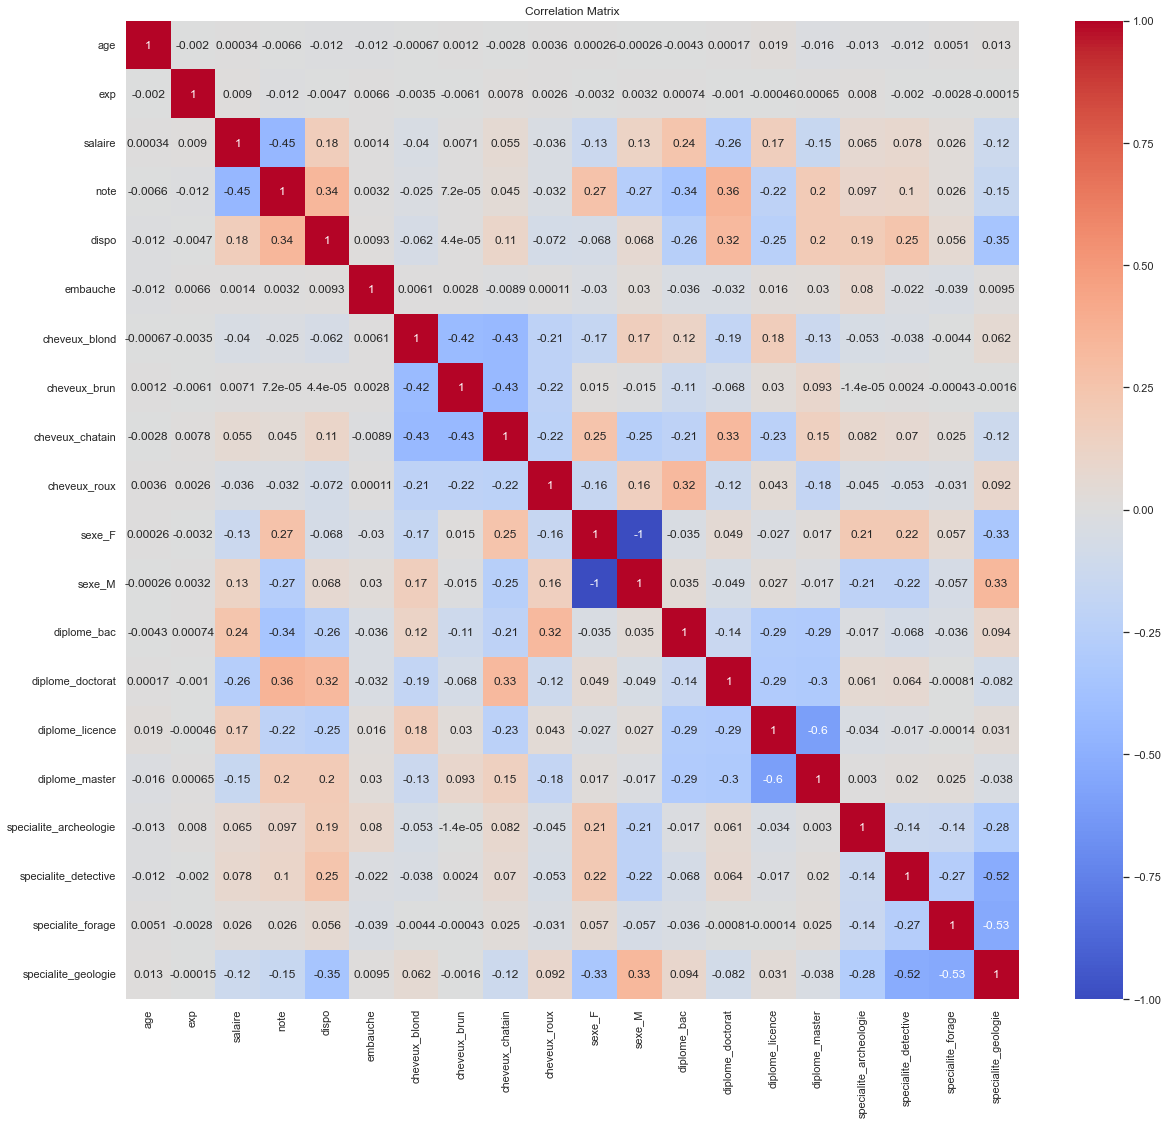

In [157]:

# Plotting the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Essai infructueux d'application de l'algorithme de Louvain pour détecter les communautés

In [158]:
import networkx as nx
import community as community_louvain

In [159]:
#
a="""
# Exemple de matrice de corrélation (remplacez ceci par votre matrice)
corr_matrix = df_encoded.corr()

# Création du graphe à partir de la matrice de corrélation
G = nx.Graph()
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
        # Ajouter une arête si la corrélation est assez forte
        if abs(corr_matrix[i, j]) > 0.5: 
            G.add_edge(i, j, weight=corr_matrix[i, j])

# Application de l'algorithme de Louvain
partition = community_louvain.best_partition(G)

# Visualisation
pos = nx.spring_layout(G)
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.show()
"""

## prédiction de la colonne embauche

In [160]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19804 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    19804 non-null  datetime64[ns]
 1   age                     19804 non-null  float64       
 2   exp                     19804 non-null  float64       
 3   salaire                 19804 non-null  float64       
 4   note                    19804 non-null  float64       
 5   dispo                   19804 non-null  int64         
 6   embauche                19804 non-null  int64         
 7   cheveux_blond           19804 non-null  uint8         
 8   cheveux_brun            19804 non-null  uint8         
 9   cheveux_chatain         19804 non-null  uint8         
 10  cheveux_roux            19804 non-null  uint8         
 11  sexe_F                  19804 non-null  uint8         
 12  sexe_M                  19804 non-null  uint8 

In [161]:
# Suppression de la colonne 'date' du DataFrame df_encoded
df_encoded = df_encoded.drop(columns=['date'])

# Définition d'une fonction pour nettoyer les noms de colonnes
def clean_feature_names(df):
    df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '_')  # Remplace les caractères non alphanumériques par des underscores
    return df

# Application de la fonction clean_feature_names au DataFrame df_encoded
df_encoded = clean_feature_names(df_encoded)

# Création d'une copie du DataFrame df_encoded dans df_save
df_save = df_encoded.copy()


In [162]:
# Séparation des données en variables cibles (y) et variables explicatives (X)
y = df_encoded["embauche"]  # La variable cible est "embauche"
X = df_encoded.drop(columns=['embauche'])  # Les variables explicatives sont toutes les autres colonnes sauf "embauche"

# Division des données en ensembles d'entraînement et de test
# Le paramètre test_size indique la proportion de données à inclure dans l'ensemble de test (ici, 70% d'entraînement, 30% de test)
# random_state est utilisé pour garantir que la division des données est reproductible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=123)


In [77]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models
result_classifier, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:16<00:00,  1.78it/s]

[LightGBM] [Info] Number of positive: 700, number of negative: 5241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 5941, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117825 -> initscore=-2.013187
[LightGBM] [Info] Start training from score -2.013187


In [78]:
result_classifier

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.87,0.71,0.71,0.88,0.04
ExtraTreesClassifier,0.92,0.70,0.70,0.90,0.63
LabelSpreading,0.88,0.69,0.69,0.88,4.38
LabelPropagation,0.88,0.69,0.69,0.88,4.13
XGBClassifier,0.91,0.69,0.69,0.90,0.37
LGBMClassifier,0.92,0.69,0.69,0.90,0.24
BaggingClassifier,0.91,0.69,0.69,0.90,0.24
RandomForestClassifier,0.92,0.68,0.68,0.91,0.83
KNeighborsClassifier,0.91,0.68,0.68,0.90,0.43


In [79]:
# Dans un cas ideal il faudrait regarder les 5 premier algorithme en réalisant un finetunning 

In [100]:
# Créer un classificateur DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Définir une grille de paramètres à rechercher
param_grid = {
    'criterion': ['gini', 'entropy'],  # Fonction de critère
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons requis dans une feuille
}

# Créer un objet GridSearchCV pour la recherche sur grille
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Exécutez la recherche sur grille sur vos données
grid_search.fit(X_train, y_train)

# Affichez les meilleurs paramètres trouvés
print("Meilleurs paramètres :")
print(grid_search.best_params_)

# Affichez la meilleure performance du modèle
print("Meilleure performance du modèle :")
print(grid_search.best_score_)

Meilleurs paramètres :
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Meilleure performance du modèle :
0.899512931388457


In [101]:
# On applique le model et on ecommprend mieux ses résultats

decision_tree = DecisionTreeClassifier(**grid_search.best_params_)

# Ajustez le modèle aux données d'entraînement
decision_tree.fit(X_train, y_train)

# Utilisez le modèle entraîné pour faire des prédictions sur l'ensemble de test
y_pred = decision_tree.predict(X_test)

# Générez un rapport de classification
report = classification_report(y_test, y_pred, output_dict=True)

# Créez un DataFrame à partir du rapport
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.92,0.97,0.94,12300.00
1,0.59,0.34,0.43,1563.00
accuracy,0.90,0.90,0.90,0.90
macro avg,0.76,0.65,0.69,13863.00
weighted avg,0.88,0.90,0.89,13863.00


    Précision : La précision mesure la proportion de prédictions positives correctes parmi toutes les prédictions positives faites par le modèle.

    Rappel : Le rappel mesure la proportion de vrais positifs identifiés parmi tous les exemples réels de la classe.

    F1-Score : Le score F1 est une moyenne pondérée de la précision et du rappel, qui mesure l'harmonie entre précision et rappel.

    Accuracy : L'accuracy mesure la proportion totale de prédictions correctes parmi toutes les prédictions.

    Macro Avg : La moyenne macro est la moyenne non pondérée des métriques (précision, rappel, F1-score) calculées pour chaque classe.

    Weighted Avg : La moyenne pondérée est la moyenne des métriques (précision, rappel, F1-score) calculées pour chaque classe, pondérée par le support (le nombre d'exemples dans chaque classe).

Les arbres de décision sont des modèles d'apprentissage automatique non paramétriques et non linéaires, ce qui signifie qu'ils ne font pas d'hypothèses sur la distribution des données.

On observe néanmoins un biais pour reduire ce biais on peut appliquer différents type d'algorithme

In [102]:
# Créez un pipeline avec SMOTE ou RandomUnderSampler comme étape de transformation
# et votre modèle DecisionTreeClassifier comme étape finale
pipeline = make_pipeline(
    RandomUnderSampler(sampling_strategy=0.4),  # Utilisez SMOTE pour le sur-échantillonnage
    DecisionTreeClassifier(**grid_search.best_params_)  # Remplacez par votre modèle
)

# Entraînez le modèle avec le pipeline
pipeline.fit(X_train, y_train)

# Utilisez le modèle entraîné pour faire des prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Générez un rapport de classification
report = classification_report(y_test, y_pred, output_dict=True)

# Créez un DataFrame à partir du rapport
report_df = pd.DataFrame(report).transpose()
report_df


,precision,recall,f1-score,support
0,0.95,0.89,0.92,12300.00
1,0.42,0.61,0.50,1563.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.68,0.75,0.71,13863.00
weighted avg,0.89,0.86,0.87,13863.00


On peux faire le même travail avec une regression pour prédire le salaire 

In [126]:
df_encoded = df_save.copy()

y = df_encoded["salaire"]
X = df_encoded.drop(columns=['salaire'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=123)

clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models
result_regressor, predictions = clf.fit(X_train, X_test, y_train, y_test)

 74%|████████████████████████████████████████████████████████████▌                     | 31/42 [28:54<10:15, 55.94s/it]


KeyboardInterrupt: 

## Partie statistique

### Analyse de la rémunération :

1) Quels sont les facteurs qui influencent le plus le salaire ? (âge, expérience, diplôme, spécialité...)

In [163]:
# Chargement du jeu de données depuis un fichier CSV
file_path = 'data_v1.0 (3).csv'
data = pd.read_csv(file_path)

# Prétraitement des données pour l'analyse
# Suppression des lignes avec des valeurs manquantes dans les colonnes pertinentes
data_clean = data.dropna(subset=['age', 'exp', 'salaire', 'sexe', 'diplome', 'specialite'])

# Conversion des variables catégorielles en variables indicatrices (dummy variables)
data_clean = pd.get_dummies(data_clean, columns=['sexe', 'diplome', 'specialite'], drop_first=True)

# Analyse des facteurs influençant le salaire à l'aide de la régression linéaire multiple
X = data_clean.drop(['salaire', 'Unnamed: 0', 'index', 'date', 'cheveux', 'note', 'dispo', 'embauche'], axis=1)
y = data_clean['salaire']

# Ajout d'une constante au modèle (intercept)
X = sm.add_constant(X)

# Construction du modèle de régression linéaire multiple
model = sm.OLS(y, X).fit()

# Affichage des résultats
model_summary = model.summary().tables[1].as_html()
model_summary_df = pd.read_html(model_summary, header=0, index_col=0)[0]

# Affichage des résultats
model_summary_df


,coef,std err,t,P>|t|,[0.025,0.975]
const,39420.00,214.29,183.95,0.00,39000.00,39800.00
age,1.36,3.32,0.41,0.68,-5.15,7.87
exp,12.95,10.59,1.22,0.22,-7.81,33.71
sexe_M,2023.39,69.99,28.91,0.00,1886.21,2160.57
diplome_doctorat,-7065.71,128.15,-55.14,0.00,-7316.89,-6814.53
diplome_licence,-2285.21,105.06,-21.75,0.00,-2491.14,-2079.27
diplome_master,-4482.15,105.06,-42.66,0.00,-4688.09,-4276.22
specialite_detective,-860.66,140.09,-6.14,0.00,-1135.24,-586.07
specialite_forage,-1930.12,140.84,-13.71,0.00,-2206.17,-1654.07
specialite_geologie,-3539.02,134.86,-26.24,0.00,-3803.37,-3274.68


Existe-t-il une différence significative de salaire entre les genres ?

In [164]:
# Extraction du coefficient lié au genre du modèle pour l'analyse de la différence de salaire entre les genres
gender_coef = model.params['sexe_M']  # Extraction du coefficient pour la variable 'sexe_M'
gender_coef_p_value = model.pvalues['sexe_M']  # Extraction de la valeur p associée au coefficient 'sexe_M'

# Création d'une chaîne de caractères pour afficher la différence de salaire en fonction du genre et de sa valeur p
result_string = f"Gender Salary Difference: {gender_coef:.2f} Euros (p-value: {gender_coef_p_value:.4f})"

result_string  # Affichage du résultat sous forme de chaîne de caractères


'Gender Salary Difference: 2023.39 Euros (p-value: 0.0000)'

Peut-on établir un intervalle de confiance pour le salaire moyen en fonction du diplôme ou de la spécialité ?

In [165]:
# Calcul de l'intervalle de confiance à 95% pour le salaire moyen basé sur le diplôme (masters)
salaire_masters = data_clean[data_clean['diplome_master'] == 1]['salaire']  # Sélection des salaires pour les diplômés en masters
mean_masters = salaire_masters.mean()  # Calcul de la moyenne des salaires
sem_masters = stats.sem(salaire_masters)  # Calcul de l'erreur standard de la moyenne
ci_masters = stats.t.interval(0.95, len(salaire_masters) - 1, loc=mean_masters, scale=sem_masters)  # Calcul de l'intervalle de confiance

# Calcul de l'intervalle de confiance à 95% pour le salaire moyen basé sur la spécialité (géologie)
salaire_geology = data_clean[data_clean['specialite_geologie'] == 1]['salaire']  # Sélection des salaires pour la spécialité en géologie
mean_geology = salaire_geology.mean()  # Calcul de la moyenne des salaires
sem_geology = stats.sem(salaire_geology)  # Calcul de l'erreur standard de la moyenne
ci_geology = stats.t.interval(0.95, len(salaire_geology) - 1, loc=mean_geology, scale=sem_geology)  # Calcul de l'intervalle de confiance

# Création de chaînes de caractères pour les intervalles de confiance
ci_masters_str = f"95% Confidence Interval for Average Salary with a Master's Degree: {ci_masters[0]:.2f} to {ci_masters[1]:.2f} Euros"
ci_geology_str = f"95% Confidence Interval for Average Salary in Geology Specialty: {ci_geology[0]:.2f} to {ci_geology[1]:.2f} Euros"

ci_masters_str, ci_geology_str  # Affichage des résultats sous forme de chaînes de caractères


("95% Confidence Interval for Average Salary with a Master's Degree: 33865.27 to 34076.67 Euros",
 '95% Confidence Interval for Average Salary in Geology Specialty: 34284.23 to 34481.93 Euros')

### Analyse de l'embauche :

Quels facteurs augmentent la probabilité d'embauche ? (utilisation de modèles de régression logistique)

In [166]:
# Chargement des données
data = pd.read_csv('data_v1.0 (3).csv')

# Prétraitement
data_clean = data.dropna(subset=['age', 'exp', 'sexe', 'diplome', 'specialite'])
data_clean = pd.get_dummies(data_clean, columns=['sexe', 'diplome', 'specialite'], drop_first=True)

# Préparation des données pour la régression logistique
X = data_clean.drop(['embauche', 'Unnamed: 0', 'index', 'date', 'cheveux', 'note', 'dispo', 'salaire'], axis=1)
y = data_clean['embauche']
X = sm.add_constant(X)

# Régression logistique
model_logit = sm.Logit(y, X).fit()

# Affichage des résultats
model_logit.summary()

Optimization terminated successfully.
         Current function value: 0.350185
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               embauche   No. Observations:                19517
Model:                          Logit   Df Residuals:                    19507
Method:                           MLE   Df Model:                            9
Date:                Thu, 23 Nov 2023   Pseudo R-squ.:                 0.01680
Time:                        11:43:02   Log-Likelihood:                -6834.6
converged:                       True   LL-Null:                       -6951.3
Covariance Type:            nonrobust   LLR p-value:                 2.984e-45
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.6843      0.147    -11.491      0.000      -1.972      -1.397
age                     -0.0035      0.002     -1.503      0.133      -0.008       0.001
exp                      0.0066      0.008      0.886      0.376      -0.008       0.021
sexe_M                   0.3078      0.051      5.985      0.000       0.207       0.409
diplome_doctorat         0.0252      0.103      0.245      0.807      -0.177       0.227
diplome_licence          0.4266      0.082      5.201      0.000       0.266       0.587
diplome_master           0.4736      0.082      5.793      0.000       0.313       0.634
specialite_detective    -0.9255      0.086    -10.807      0.000      -1.093      -0.758
specialite_forage       -1.0974      0.088    -12.481      0.000      -1.270      -0.925
specialite_geologie     -0.8620      0.080    -10.818      0.000      -1.018      -0.706
========================================================================================
"""

Calculer l'intervalle de confiance pour le taux d'embauche en fonction de différents critères (diplôme, spécialité, etc.)

In [167]:
# Exemple pour le diplôme de master
embauche_masters = data_clean[data_clean['diplome_master'] == 1]['embauche']
prop_masters = embauche_masters.mean()
ci_masters = stats.t.interval(0.95, len(embauche_masters)-1, loc=prop_masters, scale=stats.sem(embauche_masters))

# Exemple pour la spécialité en géologie
embauche_geology = data_clean[data_clean['specialite_geologie'] == 1]['embauche']
prop_geology = embauche_geology.mean()
ci_geology = stats.t.interval(0.95, len(embauche_geology)-1, loc=prop_geology, scale=stats.sem(embauche_geology))

# Affichage des intervalles de confiance
ci_masters, ci_geology

((0.11933048838967975, 0.1345386400382323),
 (0.11114484480705442, 0.1238857050911126))